In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-segmentation/bank_transactions.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/bank-customer-segmentation/bank_transactions.csv')

In [4]:
data.shape

(1048567, 9)

In [5]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [7]:
data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [8]:
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)'], dtype='object')

In [9]:
cat_cols = data.select_dtypes(exclude=np.number).columns
cat_cols

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'TransactionDate'],
      dtype='object')

In [10]:
data[num_cols].skew()

CustAccountBalance         60.530334
TransactionTime            -0.836924
TransactionAmount (INR)    47.337252
dtype: float64

In [11]:
data.duplicated().sum()

0

In [12]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [13]:
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])

In [14]:
data.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

data[(data['CustGender'].isna()==True) | (data['CustomerID']=='C5793145')]

In [15]:
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [16]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [17]:
data['CustomerDOB'] = data.groupby('CustomerID')['CustomerDOB'].transform(lambda x: x.fillna(x.max()))


In [18]:
data['CustomerDOB'].isna().sum()

2378

In [19]:
dic = dict(data.groupby(by='CustomerID')['CustGender'].describe().top)

In [20]:
data['CustGender'] = np.where(data['CustGender'].isna()==True,data['CustomerID'].map(dic),data['CustGender'])

data['CustGender'] = data.iloc[:,:].groupby(by='CustomerID')['CustGender'].transform(lambda x:x.fillna(x.mode()))
data['CustGender'].isna().sum()

In [21]:
data['CustGender'].isna().sum()

803

In [22]:
data['CustAccountBalance'] = data.groupby('CustomerID')['CustAccountBalance'].transform(lambda x: x.fillna(x.mean()))


In [23]:
data['CustAccountBalance'].isna().sum()

1666

In [24]:
data.isna().sum()[data.isna().sum()!=0]

CustomerDOB           2378
CustGender             803
CustLocation           151
CustAccountBalance    1666
dtype: int64

In [25]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [26]:
data['CustGender'].value_counts()

CustGender
M    765741
F    282022
T         1
Name: count, dtype: int64

In [27]:
data['CustGender'].mode()

0    M
Name: CustGender, dtype: object

In [28]:
data['CustLocation'].value_counts()

CustLocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: count, Length: 9355, dtype: int64

In [29]:
data[(data['CustAccountBalance'].isna()==True) & (data['TransactionAmount (INR)']>=115400)]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
51809,T51810,C4126584,1983-11-15,F,PUNE,NaN,2016-03-08,165725,156000.0


In [30]:
data[(data['CustAccountBalance']==115400) & (data['TransactionAmount (INR)']>115400) | (data['CustGender'] =='T')]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1800-01-01,T,CHENNAI,50050.0,2016-10-09,170731,32500.0


In [31]:
data.drop(index=[959987],inplace=True)

In [32]:
data.shape

(1048566, 9)

In [33]:
data.dropna(inplace=True)

In [34]:
data.shape

(1043616, 9)

In [35]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [36]:
data_or = data.copy()

In [37]:
data_or.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [38]:
data_or.drop(columns=['TransactionTime','TransactionID'],inplace=True)

In [39]:
data_or['CustAge'] = data_or['TransactionDate'].dt.year - data_or['CustomerDOB'].dt.year
data_or['CustAge'].value_counts()

CustAge
 26    72724
 25    71308
 27    69257
 24    66596
 28    62991
       ...  
-4         2
 5         2
 0         2
-9         1
-2         1
Name: count, Length: 100, dtype: int64

In [40]:
data_or.CustLocation.nunique()

9332

In [41]:
data_or.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,-57
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,28


data['month_trans_amount_mean' ] = data.groupby(by=data['TransactionDate'].dt.month)['TransactionAmount (INR)'].transform('mean')
data['month_trans_amount_median' ] = data.groupby(by=data['TransactionDate'].dt.month)['TransactionAmount (INR)'].transform('median')
data['month_trans_amount_std' ] = data.groupby(by=data['TransactionDate'].dt.month)['TransactionAmount (INR)'].transform('std')
data['month_trans_amount_min' ] = data.groupby(by=data['TransactionDate'].dt.month)['TransactionAmount (INR)'].transform('min')
data['month_trans_amount_max' ] = data.groupby(by=data['TransactionDate'].dt.month)['TransactionAmount (INR)'].transform('max')

data['year_trans_amount_mean' ] = data.groupby(by=data['TransactionDate'].dt.year)['TransactionAmount (INR)'].transform('mean')
data['year_trans_amount_median' ] = data.groupby(by=data['TransactionDate'].dt.year)['TransactionAmount (INR)'].transform('median')
data['year_trans_amount_std' ] = data.groupby(by=data['TransactionDate'].dt.year)['TransactionAmount (INR)'].transform('std')
data['year_trans_amount_min' ] = data.groupby(by=data['TransactionDate'].dt.year)['TransactionAmount (INR)'].transform('min')
data['year_trans_amount_max' ] = data.groupby(by=data['TransactionDate'].dt.year)['TransactionAmount (INR)'].transform('max')

data['day_trans_amount_mean' ] = data.groupby(by=data['TransactionDate'].dt.day)['TransactionAmount (INR)'].transform('mean')
data['day_trans_amount_median' ] = data.groupby(by=data['TransactionDate'].dt.day)['TransactionAmount (INR)'].transform('median')
data['day_trans_amount_std' ] = data.groupby(by=data['TransactionDate'].dt.day)['TransactionAmount (INR)'].transform('std')
data['day_trans_amount_min' ] = data.groupby(by=data['TransactionDate'].dt.day)['TransactionAmount (INR)'].transform('min')
data['day_trans_amount_max' ] = data.groupby(by=data['TransactionDate'].dt.day)['TransactionAmount (INR)'].transform('max')

In [42]:
data_or.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,-57
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,28


data.groupby(by = ['CustomerID'])['CustAccountBalance'].describe()

## Recency

In [43]:
data_or['Recency'] = (max(data_or['TransactionDate']) - data_or['TransactionDate']).dt.days
x = data_or.groupby('CustomerID')['Recency'].min()
x = x.reset_index()
del data_or['Recency']
data_or = pd.merge(data_or,x, on='CustomerID', how='inner')

In [44]:
x

,CustomerID,Recency
0,C1010011,74
1,C1010012,117
2,C1010014,154
3,C1010018,85
4,C1010024,113
...,...,...
879353,C9099836,154
879354,C9099877,85
879355,C9099919,113
879356,C9099941,103


In [45]:
data_or.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustAge,Recency
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22,305
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41,305
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20,305
3,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,-57,118
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,28,305


## Frequency

In [46]:
data_or['Frequency'] = data_or.groupby('CustomerID')['TransactionAmount (INR)'].transform('count')

## Monetary

In [47]:
data_or['Monetary'] = data_or.groupby('CustomerID')['TransactionAmount (INR)'].transform('sum')

In [48]:
data_o = data_or[data_or['CustomerDOB']<data_or['TransactionDate']]

In [49]:
data_o['CustomerID'].nunique()

811733

Beacuse we have some customer's dob invalid that's why we can not interpret any intelligence from here so we will drop this column

In [50]:
data_o['Trans_Day'] = data_o['TransactionDate'].dt.day
data_o['Trans_month'] = data_o['TransactionDate'].dt.month

In [51]:
data_o.drop(columns=['CustomerDOB','TransactionDate','CustomerID'],inplace=True)

In [52]:
data_o

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustAge,Recency,Frequency,Monetary,Trans_Day,Trans_month
0,F,JAMSHEDPUR,17819.05,25.0,22,305,1,25.0,8,2
2,F,MUMBAI,17874.44,459.0,20,305,1,459.0,8,2
4,F,NAVI MUMBAI,6714.43,1762.5,28,305,1,1762.5,8,2
6,F,MUMBAI,973.46,566.0,24,61,4,821.0,8,2
7,M,MUMBAI,95075.54,148.0,34,305,1,148.0,8,2
...,...,...,...,...,...,...,...,...,...,...
1043611,M,NEW DELHI,7635.19,799.0,26,82,1,799.0,18,9
1043612,M,NASHIK,27311.42,460.0,24,82,1,460.0,18,9
1043613,M,HYDERABAD,221757.06,770.0,27,82,2,978.0,18,9
1043614,M,VISAKHAPATNAM,10117.87,1000.0,38,82,1,1000.0,18,9


In [53]:
data_org = data_o.copy()

In [54]:
data_org.drop(columns=['CustGender','CustLocation'],inplace=True)

In [55]:
data_org

,CustAccountBalance,TransactionAmount (INR),CustAge,Recency,Frequency,Monetary,Trans_Day,Trans_month
0,17819.05,25.0,22,305,1,25.0,8,2
2,17874.44,459.0,20,305,1,459.0,8,2
4,6714.43,1762.5,28,305,1,1762.5,8,2
6,973.46,566.0,24,61,4,821.0,8,2
7,95075.54,148.0,34,305,1,148.0,8,2
...,...,...,...,...,...,...,...,...
1043611,7635.19,799.0,26,82,1,799.0,18,9
1043612,27311.42,460.0,24,82,1,460.0,18,9
1043613,221757.06,770.0,27,82,2,978.0,18,9
1043614,10117.87,1000.0,38,82,1,1000.0,18,9


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
a = le.fit_transform(data['CustLocation'])
data['CustLocation'] = a
data = pd.get_dummies(data,drop_first=True)
data['CustGender_M'] = data['CustGender_M'].astype(int)
data

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()
df_sc = sc.fit_transform(data_org)
df_sc = pd.DataFrame(df_sc,columns = data_org.columns)

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=8)
pca.fit(df_sc)

PCA(n_components=8)

In [61]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25327161, 0.48810534, 0.62419172, 0.7518362 , 0.86361727,
       0.9679918 , 0.98604179, 1.        ])

In [62]:
pca = PCA(n_components=6)
pca_df = pca.fit_transform(df_sc)
pca_data = pd.DataFrame(pca_df,columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [63]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.285714,0.287543,-0.201678,0.176851,0.142724,-0.243403
1,-3.268079,0.370799,-0.241094,0.205245,0.178377,-0.246316
2,-3.201610,0.663711,-0.179412,0.218492,0.043608,-0.223418
3,-0.259810,0.286924,-2.262204,-4.046973,-0.152766,-1.153802
4,-3.262858,0.370197,0.065778,0.060519,0.062465,-0.219098


In [64]:
data_pca = pca_data.sample(n=10000,random_state=42).reset_index(drop=True)
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.837281,-0.209491,-0.313694,-0.661588,-0.153646,-0.701359
1,0.383159,-0.154883,0.122583,0.870478,0.175141,-0.388138
2,2.168004,5.400511,-0.102689,2.269328,0.133754,-1.413348
3,-0.804642,-0.117672,-0.174172,0.294723,0.186421,0.788041
4,1.986405,-0.773001,-0.891276,-0.839626,0.217482,1.168243


In [65]:
data_pca.shape

(10000, 6)

In [66]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

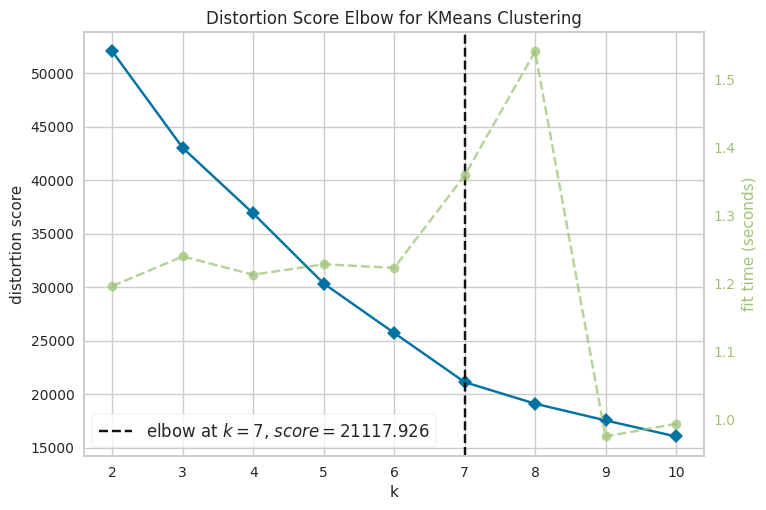

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
kelbow = KElbowVisualizer(KMeans(),k=10)
kelbow.fit(data_pca)
kelbow.show()

In [73]:
silo_score = []
for i in [2,3,4,5,6,7,8,9,10]:
    model = KMeans(n_clusters=i)
    pred = model.fit_predict(data_pca)
    silo_score.append(silhouette_score(data_pca,pred))
print(silo_score)

[0.35227142019645286, 0.38667975852869985, 0.3669764262428931, 0.37352200929217944, 0.37832986963211085, 0.3770317310213042, 0.3691398731291858, 0.38681453734502413, 0.3889562996652604]


In [69]:
silo_score

[0.35227142019645286,
 0.328412647141959,
 0.3669435226211708,
 0.37352200929217944,
 0.37138895831707824,
 0.3770317310213042,
 0.36906006489085164,
 0.37350183496956724,
 0.3908532494141931]

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

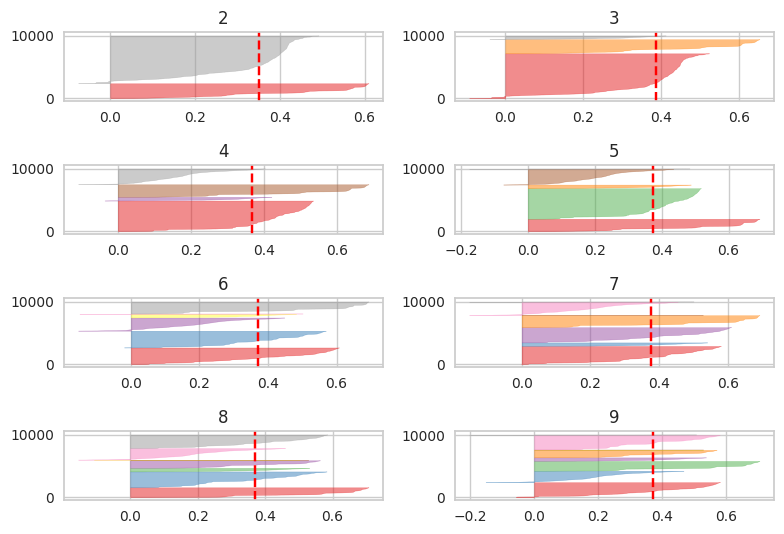

In [71]:
t = 1
for i in [2,3,4,5,6,7,8,9]:
    plt.subplot(4,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [74]:
final_model = KMeans(n_clusters=6)
final_model.fit(data_pca)
pred = final_model.predict(data_pca)
silhouette_score(data_pca,pred)

0.3782540289222766

In [75]:
data_pca['KMeans_pred'] = pred
data_pca['KMeans_pred'].value_counts()

KMeans_pred
0    4881
1    2497
2    1980
4     566
3      57
5      19
Name: count, dtype: int64

In [76]:
centroids = final_model.cluster_centers_

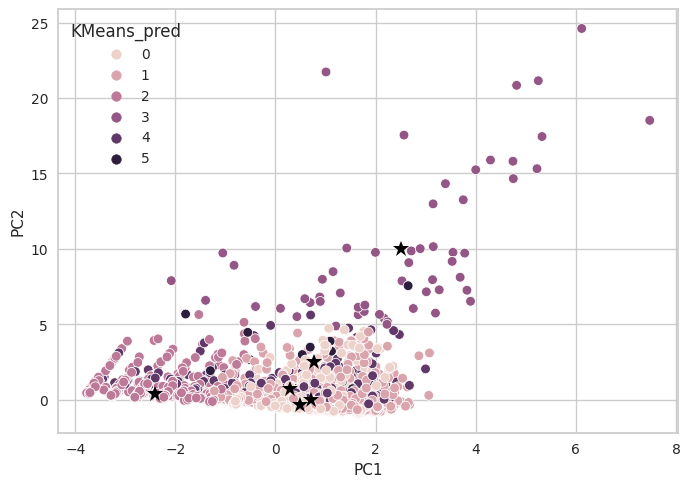

In [80]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['KMeans_pred'])

for i in range(6):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

### Agglomerative Clusterring

In [81]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances

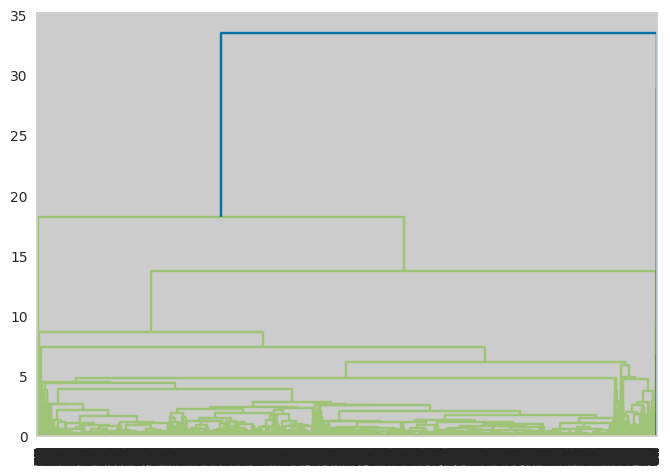

In [88]:
link = linkage(data_pca,method='average')
dendrogram(link)
plt.show()

In [89]:
dist_matx = euclidean_distances(data_pca)
actual_dist = dist_matx[np.triu_indices(10000,k=1)]
ccc , cophenet_dist = cophenet(link,actual_dist)
ccc

0.9290289308109506

In [90]:
for i in [2,3,4,5,6,7,8,9]:
    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    pred = model.fit_predict(data_pca)
    print(f'Silhoutte Score for {i} clusters {silhouette_score(data_pca,pred)}')

Silhoutte Score for 2 clusters 0.8999090531808226
Silhoutte Score for 3 clusters 0.8884788214194781
Silhoutte Score for 4 clusters 0.817452310037439
Silhoutte Score for 5 clusters 0.759703116682345
Silhoutte Score for 6 clusters 0.7513395639599859
Silhoutte Score for 7 clusters 0.7508017216129291
Silhoutte Score for 8 clusters 0.6270763172859525
Silhoutte Score for 9 clusters 0.6269313413481237


In [91]:
final_agg = AgglomerativeClustering(n_clusters=2)
pred = final_agg.fit_predict(data_pca)
data_pca['Agg_pred'] = pred

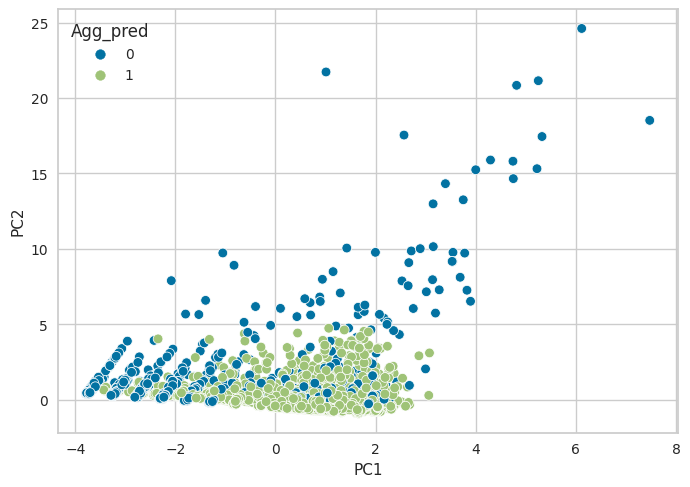

In [92]:
sns.scatterplot(x = data_pca['PC1'],y = data_pca['PC2'],hue = data_pca['Agg_pred']);